# Sample selection: stars

- Take the cross-matched Gaia-TIC sample and select fully convective stars
- Make some diagnostic plots
- Find all available light curves
- Get all light curves, where automated analysis failed and add them to the sum of investigated light curves

In [1]:
# basics
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# data management
import os
CWD = "/".join(os.getcwd().split("/")[:-2])

In [2]:
df = pd.read_csv(f"{CWD}/data/gaia/crossmatch_5_arcsec.csv")

In [3]:
# preview the final sample
df.loc[df.TIC.isin([237880881, 44984200, 277539431, 452922110]), ["Tmag", "TIC", "g_rp"]]

,Tmag,TIC,g_rp
10053,13.982,452922110,1.452889
19617,13.474,237880881,1.369149
34569,12.583,44984200,1.540246
36370,13.001,277539431,1.513121


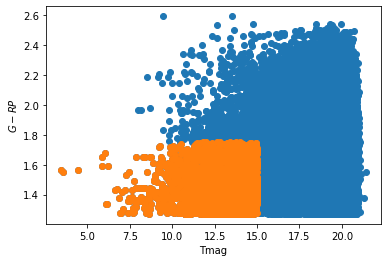

In [5]:
df3 = df[(df.Tmag<15) & (df.g_rp<1.75)]
plt.scatter(df.Tmag, df.g_rp)
plt.scatter(df3.Tmag, df3.g_rp)
plt.xlabel("Tmag")
plt.ylabel(r"$G-RP$");

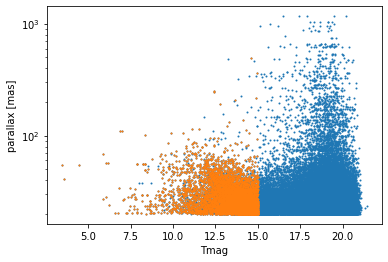

In [6]:
plt.scatter(df.Tmag, df.parallax, s=1)
plt.scatter(df3.Tmag, df3.parallax, s=1)
plt.xlabel("Tmag")
plt.ylabel("parallax [mas]")
plt.yscale("log")

# Find all available light curves (this can take a while)

In [7]:
from lightkurve import search_lightcurvefile
res = pd.DataFrame(columns=["sector", "TIC"])

In [ ]:
for i, row in df3.iterrows():
    TIC = row.TIC
    try:
        lst = search_lightcurvefile(f"TIC {TIC}", cadence="short")
        _ = {"sector":lst.table.to_pandas()["observation"].str[12:].values,
         "TIC":TIC}
        r = pd.DataFrame(_)
        with open(f"{CWD}/data/gaia/gotlc.csv", "a") as f:
            r.to_csv(f,header=False, index=False)
        print(i)
    except:
        with open(f"{CWD}/data/gaia/nolc.txt", "a") as f:
            f.write(f"TIC {TIC}\n")


# Read in the light curve list

In [8]:
# read lcs that failed to be treated automatically, and had to be analyzed manually
failsman = pd.read_csv(f"{CWD}/data/gaia/19_10_2020_manual_fails_year1.csv")

In [9]:
ticsman, lcsman = failsman[failsman.nolc==0].tic.unique().shape[0], failsman[failsman.nolc==0].shape[0]

In [10]:
success = pd.read_csv(f"{CWD}/data/gaia/gotlc.csv")
success = success[success.sector<27] # only Cycles 1 and 2

In [11]:
ticsaut, lcsaut = success.tic_id.unique().shape[0], success.shape[0]

In [12]:
ticsaut, ticsman, ticsaut + ticsman

(3097, 78, 3175)

In [13]:
lcsman, lcsaut, lcsman + lcsaut

(91, 6200, 6291)